# Project: Investigate a Dataset on movies- taken from 'The Movie Database'


###  I have selected the 'TMB-Movies' data set for this project.

## The following questions would be analyzed in this project:
### 1. What is the relationship between the popularity of the movie and its rating?

### 2. What is the relationship between vote count and average rating of a movie?

In [342]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [343]:
#loading the dataset
df = pd.read_csv('tmdb_movies.csv')

In [344]:
#In the following cells we would explore the data to get few introductory insights
df.shape

(10866, 21)

In [345]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [346]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

In [347]:
#Here we would be dropping few columns from our dataframe
#Dropping the genre column because even though it can give us various interesting insights,
#the number of genre per movie is not the same and if we separate the genres from a single column,
#it would lead to lots of missing values.
df_1=df.drop(['imdb_id','original_title','cast','homepage','tagline','overview','production_companies','release_date','keywords','genres','release_year','director'],axis=1)

In [348]:
# Dropping the budget and revenue columns because the budget_adj and revenue_adj have more relevant data
df_1=df_1.drop(['budget','revenue'],axis=1)

In [349]:
#Looking for missing values
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10866 non-null  int64  
 1   popularity    10866 non-null  float64
 2   runtime       10866 non-null  int64  
 3   vote_count    10866 non-null  int64  
 4   vote_average  10866 non-null  float64
 5   budget_adj    10866 non-null  float64
 6   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 594.4 KB


In [350]:
#dropping all the missing value rows(44 rows should be dropped)
df_1.dropna(axis=0,inplace=True)

In [351]:
#confirming that the rows have been dropped(no of rows should be 10822)
df_1.shape

(10866, 7)

In [352]:
#checking for duplicates
sum(df_1.duplicated())

1

In [353]:
#Dropping duplicate rows
df_1.drop_duplicates(inplace=True)

In [354]:
#Verifying that the rows have been dropped
df_1.shape

(10865, 7)

In [355]:
#Checking the data types
df_1.dtypes

id                int64
popularity      float64
runtime           int64
vote_count        int64
vote_average    float64
budget_adj      float64
revenue_adj     float64
dtype: object

In [356]:
#Adding a new column stating the qualtiy of the movie - bad,fair,good,very good
bin_names=['Poor','Bad','Good','Very Good']
bin_edges=(1,4,5,7.5,9.5)
df_1['movie_review'] = pd.cut(df_1['vote_average'],bin_edges,labels=bin_names)

In [357]:
#checking the number of movies in each category
df_1.movie_review.value_counts()

Good         8878
Bad          1310
Very Good     350
Poor          327
Name: movie_review, dtype: int64

### Our dataset is now fit for Exploratory Data Analysis

<a id='eda'></a>
## Exploratory Data Analysis:

## Research Question 1:
### What is the relationship between the popularity of the movie and its rating?

In [358]:
df_1.head(2)

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,movie_review
0,135397,32.985763,124,5562,6.5,1.379999e+08,1.392446e+09,Good
1,76341,28.419936,120,6185,7.1,1.379999e+08,3.481613e+08,Good


In [359]:
#calculating the average popularity of the movies in each category
mean_popularity = df_1.groupby('movie_review')['popularity'].mean()

In [360]:
mean_popularity

movie_review
Poor         0.308099
Bad          0.377300
Good         0.661262
Very Good    1.594094
Name: popularity, dtype: float64

Text(0, 0.5, 'Average Movie Popularity')

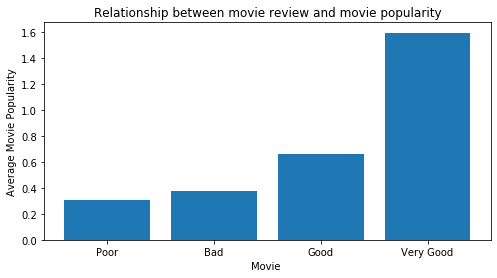

In [361]:
#Plotting the bar chart
plt.subplots(figsize = (8,4))
plt.bar(mean_popularity.index,mean_popularity)
plt.title('Relationship between movie review and movie popularity');
plt.xlabel('Movie ')
plt.ylabel('Average Movie Popularity')

Text(0, 0.5, ' Popularity')

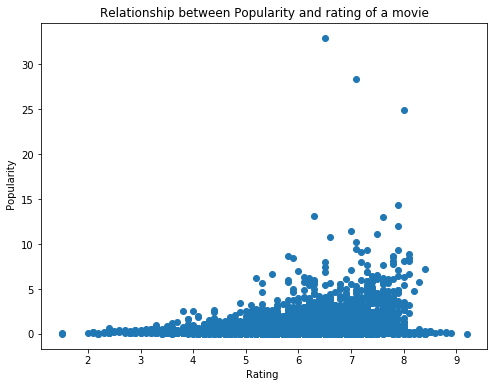

In [363]:
#Plotting the scatter plot
plt.subplots(figsize = (8,6))
plt.scatter(df_1['vote_average'],df_1['popularity'])
plt.title('Relationship between Popularity and rating of a movie');
plt.xlabel('Rating ')
plt.ylabel(' Popularity')

## Following are the observations from the above charts:
- The popularity of the movie is directly proportional to its review. That is,the very good category has the highest popularity whereas, the poor category has the lowest popularity.
- The scatter plot confirms that there is a postitve correlation between the rating of a movie and its popularity. However this is a weak positive correlation.
- There are very few outliers in the above scatter plot and thus it confirms that there is linear correlation(positive) between the considered variables.
- The movie with the highest rating has a very low popularity and thus can be termed as an **outlier** as it does not follow the general trend.
- The three points with popularity more than 25 can be termed as significant ouliers as they do not follow the trend and are far away from rest of the data points.
- The movie with the lowest rating also has a very low popularity and thus the rating seems to be genuine as far as these variables are concerned.


## Research Question 2  
### What is the relationship between vote count and average rating of a movie?

In [364]:
df_1['vote_count'].mean()

217.39963184537507

In [365]:
df_1['vote_average'].mean()

5.975011504832047

Text(0, 0.5, 'Number of votes')

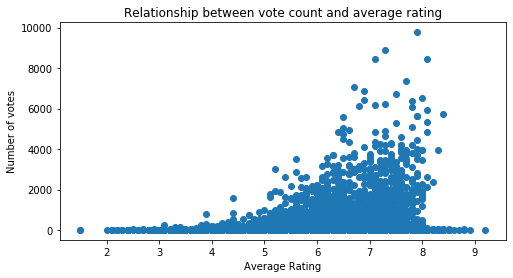

In [366]:
plt.subplots(figsize=(8,4))
plt.scatter(df_1['vote_average'],df_1['vote_count'])
plt.title('Relationship between vote count and average rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of votes')

## Following are the observations from the above scatter plot: 
- The average movie ratings are clustered between 5 and 8.
- The movies with a decent number of voters are rated between 5 and 8 and thus the average movie rating should be between 5 and 8(Avg rating = 5.97).
- All the movies with a rating more than 8 have a really low vote count and thus these ratings cannot be considered genuine as they do not follow the general trend of the plot.
- If we ignore the outliers, we can conclude that there is positive correlation between vote count and average rating that is as the number of voters increases, the average rating of the movie increases.
- The movie with the highest number of voters has a rating just below 8 and thus considering both the variables it can be termed as a really good movie.However it is an outlier as it is very far away from the general trend of the plot.
- The movie with the lowest average rating also has a very low popularity and thus it can be considered as a **Poor** movie.

<a id='conclusions'></a>
## Conclusions
- There is a weak positive correlation between the rating of a movie and its popularity.
- Higher is the popularity of the movie,better is its review.
- There is a positive correlation between the average ratings of a movie and it vote count.

## Limitations of the analysis:
1. The adjusted budget and revenue columns had the value '0.0' in more than 50% of the rows and thus these rows could not be used to make any genuine analysis for the entire data set.


### I have used the notes that I have prepared during this course for reference during this project.